## 00. Connect to below site for running R in colab

In [ ]:
https://colab.research.google.com/notebook#create=true&language=r

## 01. Installation
This section should be accompanied by a code with instructions on how to install it.

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("DESeq2") # 10mins

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'htmltools', 'openssl', 'stringi', 'tibble'



In [3]:
# Library for importing data
install.packages("remotes") # It takes some time.
remotes::install_github("compgenomr/compGenomRData")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




✔  checking for file ‘/tmp/RtmpdzgVsP/remotes407da7567e/compgenomr-compGenomRData-24484cb/DESCRIPTION’
─  preparing ‘compGenomRData’: (1.7s)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘compGenomRData_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# load the library
library(DESeq2)
library(dplyr)
library(ggplot2)
install.packages("ggrepel")
library(ggrepel)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

## 02. Usage Test

In [5]:
# Check whether package is installed
c("DESeq2") %in% installed.packages()[,"Package"]

[1] TRUE

## 03. Example

In [6]:
# count data
counts_file <- system.file("extdata/rna-seq/SRP029880.raw_counts.tsv",package = "compGenomRData")
# meta data
coldata_file <- system.file("extdata/rna-seq/SRP029880.colData.tsv",package = "compGenomRData")
counts <- as.matrix(read.table(counts_file, header = T, sep = '\t'))
# row: gene, column: sample
head(counts)
# No need width
countData <- as.matrix(subset(counts, select = c(-width)))
head(countData)

,CASE_1,CASE_2,CASE_3,CASE_4,CASE_5,CTRL_1,CTRL_2,CTRL_3,CTRL_4,CTRL_5,width
TSPAN6,776426,371725,612244,456147,513335,559544,489653,332084,238516,634115,12883
TNMD,1483,806,2995,297,1095,4631,1884,4484,1961,3976,15084
DPM1,364919,274342,248740,371045,325628,211173,123204,113606,67338,198331,23689
SCYL3,103601,97625,98387,117366,101943,160847,106890,106938,64928,101515,44637
C1ORF112,90805,59235,61460,108892,44839,52308,34236,38087,18522,58008,192074
FGR,57081,145623,26800,168519,158882,59723,24483,21608,18654,23682,23214


,CASE_1,CASE_2,CASE_3,CASE_4,CASE_5,CTRL_1,CTRL_2,CTRL_3,CTRL_4,CTRL_5
TSPAN6,776426,371725,612244,456147,513335,559544,489653,332084,238516,634115
TNMD,1483,806,2995,297,1095,4631,1884,4484,1961,3976
DPM1,364919,274342,248740,371045,325628,211173,123204,113606,67338,198331
SCYL3,103601,97625,98387,117366,101943,160847,106890,106938,64928,101515
C1ORF112,90805,59235,61460,108892,44839,52308,34236,38087,18522,58008
FGR,57081,145623,26800,168519,158882,59723,24483,21608,18654,23682


In [7]:
# meta data
metadata <- as.matrix(read.table(coldata_file, header = T, sep = '\t'))
# meta data containing features of each sample (especially group variable)
metadata

,source_name,group
CASE_1,metastasized cancer,CASE
CASE_2,metastasized cancer,CASE
CASE_3,metastasized cancer,CASE
CASE_4,metastasized cancer,CASE
CASE_5,metastasized cancer,CASE
CTRL_1,normal colon,CTRL
CTRL_2,normal colon,CTRL
CTRL_3,normal colon,CTRL
CTRL_4,normal colon,CTRL
CTRL_5,normal colon,CTRL


In [25]:
# create deseq2 object
# colData differentiates each gene as a case or control(group variable)
# design: ~group
# a formula or matrix. the formula expresses how the counts for each gene depend on the variables in colData
dds <- DESeqDataSetFromMatrix(countData = countData, 
                              colData = metadata, 
                              design = ~group)
# Only take gene which count is over 1
dds <- dds[ rowSums(DESeq2::counts(dds)) > 1, ]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [24]:
#Perform Differentially Expression analysis
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [10]:
# Check each result
# lfcSE: Standard Error for log2FoldChange
DEresults = results(dds, contrast = c("group", 'CASE', 'CTRL'), alpha = 0.05)
DEresults

log2 fold change (MLE): group CASE vs CTRL 
Wald test p-value: group CASE vs CTRL 
DataFrame with 19097 rows and 6 columns
            baseMean log2FoldChange     lfcSE      stat      pvalue        padj
           <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
TSPAN6     491987.63      0.0772416  0.283184  0.272761 7.85037e-01 8.68555e-01
TNMD         2466.25     -1.4474155  0.631826 -2.290846 2.19723e-02 5.65051e-02
DPM1       216809.25      0.9388739  0.200290  4.687581 2.76453e-06 2.28302e-05
SCYL3      104400.07     -0.2843211  0.113732 -2.499919 1.24222e-02 3.54271e-02
C1ORF112    53848.01      0.6299092  0.271324  2.321609 2.02540e-02 5.28672e-02
...              ...            ...       ...       ...         ...         ...
ETDC         22.5675      -1.795274  2.894210 -0.620298          NA          NA
LMLN2      1513.6755      -0.866152  0.542990 -1.595155  0.11067764  0.20820759
AC008687.8  297.8337      -0.412433  1.010619 -0.408099  0.68320090  0.794028

## 04. Visualization

In [11]:
# Visualization 
# For filtering, change into data.frame
DE_results <- data.frame(DEresults) 
head(DE_results)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,491987.627,0.07724162,0.2831844,0.2727608,7.850371e-01,8.685546e-01
TNMD,2466.251,-1.44741551,0.6318258,-2.2908457,2.197234e-02,5.650511e-02
DPM1,216809.249,0.93887393,0.2002896,4.6875814,2.764528e-06,2.283025e-05
SCYL3,104400.065,-0.28432108,0.1137321,-2.4999188,1.242218e-02,3.542710e-02
C1ORF112,53848.009,0.62990920,0.2713244,2.3216095,2.025397e-02,5.286722e-02
FGR,63201.419,1.64688898,0.4100160,4.0166455,5.903242e-05,3.569890e-04


In [12]:
DE_results_0.1 <- DE_results %>% filter(padj<0.1)
head(DE_results_0.1)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TNMD,2466.251,-1.4474155,0.6318258,-2.290846,2.197234e-02,5.650511e-02
DPM1,216809.249,0.9388739,0.2002896,4.687581,2.764528e-06,2.283025e-05
SCYL3,104400.065,-0.2843211,0.1137321,-2.499919,1.242218e-02,3.542710e-02
C1ORF112,53848.009,0.6299092,0.2713244,2.321609,2.025397e-02,5.286722e-02
FGR,63201.419,1.6468890,0.4100160,4.016646,5.903242e-05,3.569890e-04
CFH,1867013.952,3.3002155,0.3341762,9.875675,5.307430e-23,2.331352e-21


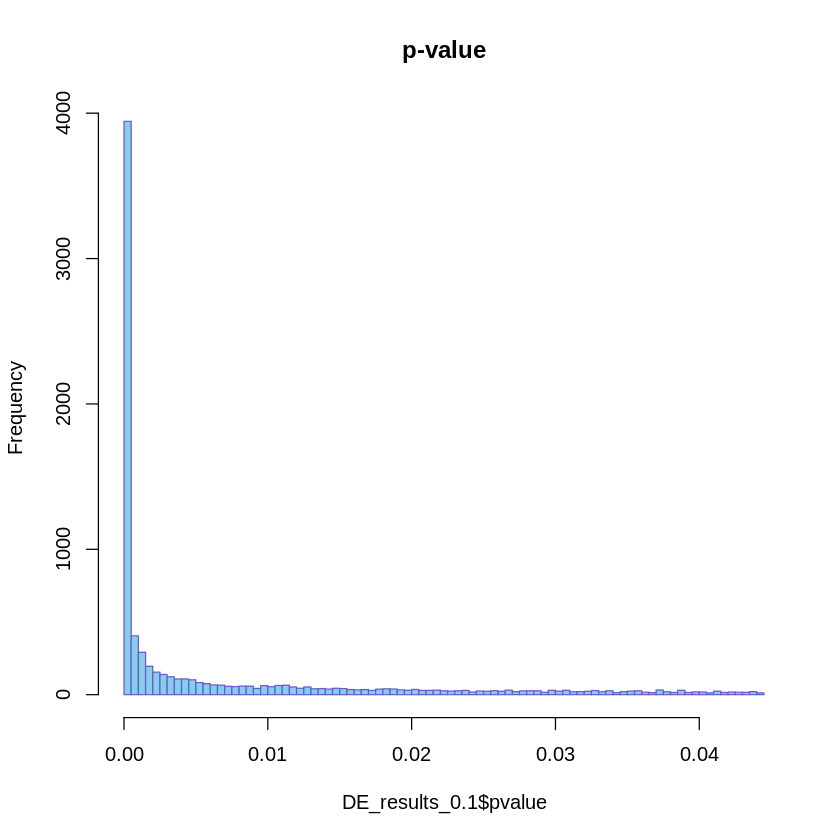

In [13]:
# Visualization - a) Histogram
hist(DE_results_0.1$pvalue, breaks=100, col="skyblue", border="slateblue", main="p-value")

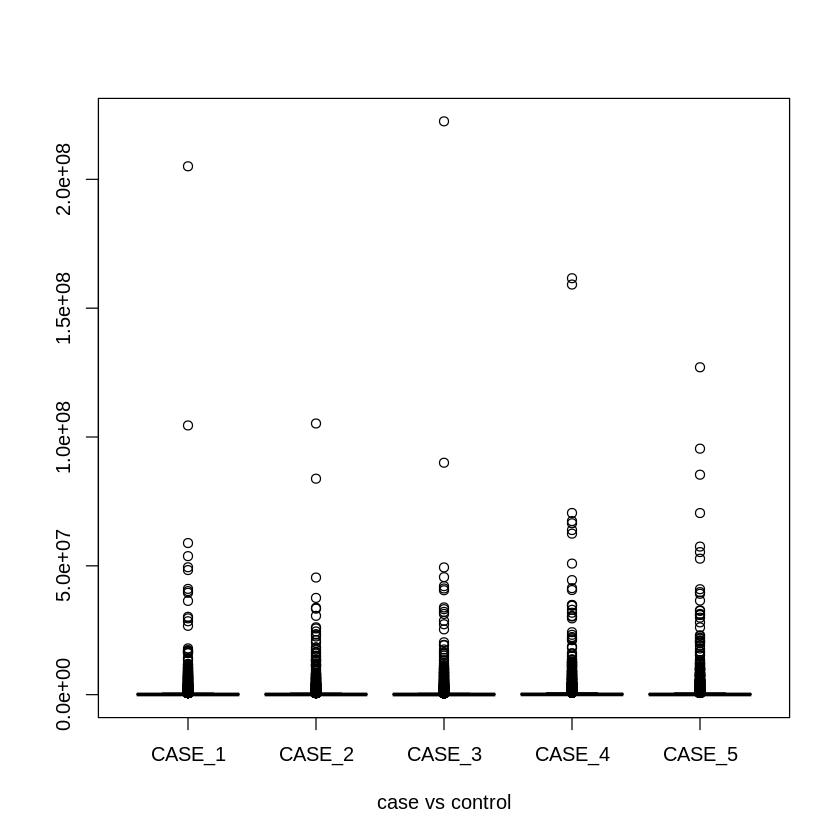

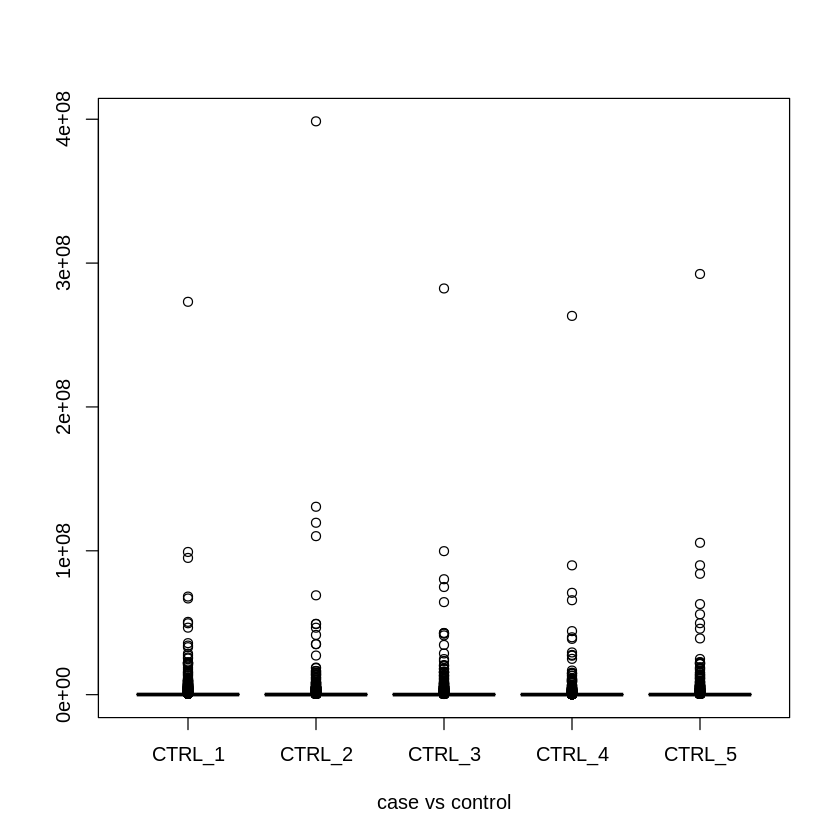

In [64]:
# Visualization - b) Boxplot
boxplot(countData[1:19719,1:5],xlab="case vs control");boxplot(countData[1:19719,6:10],xlab="case vs control")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



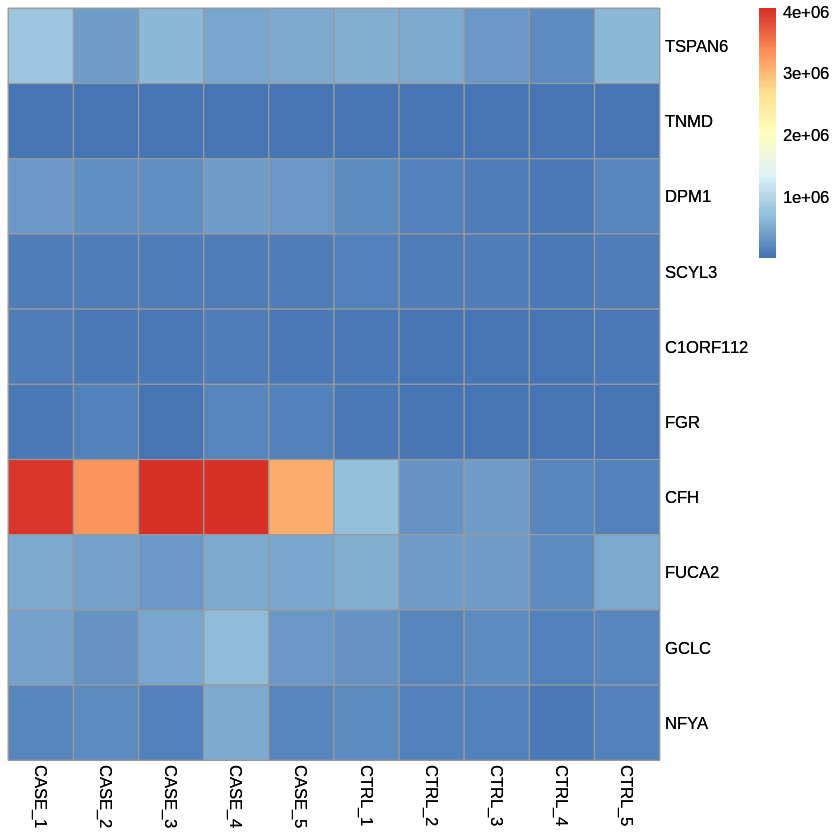

In [66]:
install.packages("pheatmap")
library(pheatmap)
p <- pheatmap(countData[1:10,1:10],cluster_rows = F,cluster_cols = F)
p

Warning message:
“ggrepel: 123 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 71 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


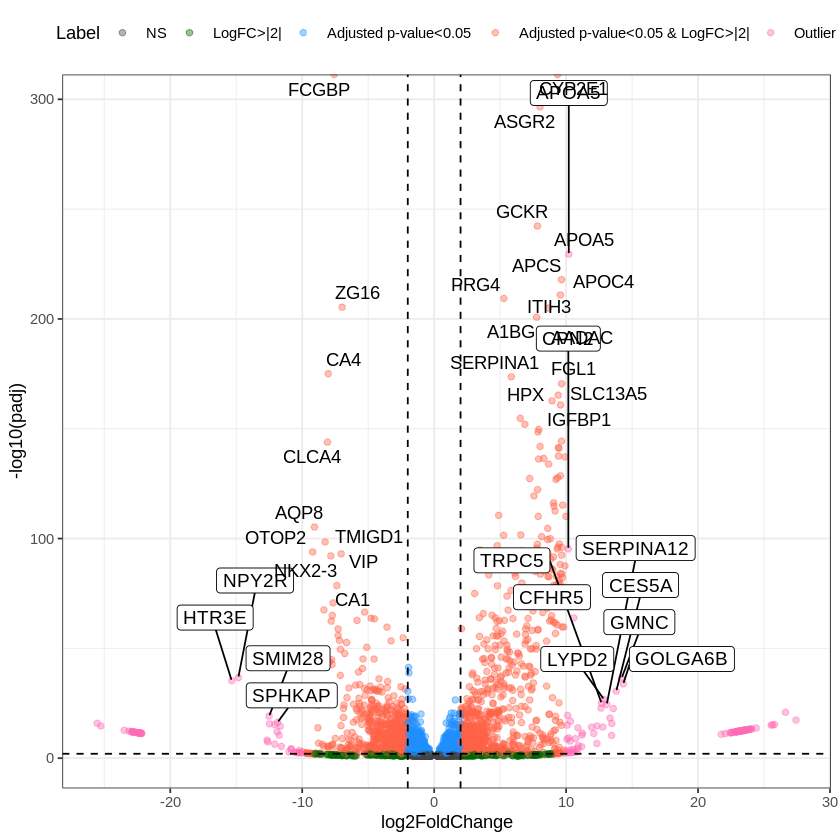

In [ ]:
# Visualization - c) Volcano plot
# y축 위로 올라갈수록 유의하다, X축은 양쪽으로 갈수록 OUTLIER
library(ggrepel)

df_res <- data.frame(DE_results_0.1)
df_res <- cbind(Gene = row.names(df_res), df_res)
row.names(df_res) <- NULL
df_res <- df_res[apply(df_res, 1, function(x) (length(which(is.na((x))))==0)),]
res_col <- rep("NS", nrow(df_res))
res_col[which(abs(df_res$log2FoldChange) > 2)] <- "LogFC>|2|" 
res_col[which(df_res$padj < 0.01)] <- "Adjusted p-value<0.05" 
res_col[which(abs(df_res$log2FoldChange) > 2 & df_res$padj < 0.01)] <- "Adjusted p-value<0.05 & LogFC>|2|"
res_col[which(abs(df_res$log2FoldChange) > 10)] <- "Outlier"
df_res <- cbind(df_res, sig = res_col)
ggplot(df_res, aes(x = log2FoldChange, y = -log10(padj), label = Gene)) +
  geom_point(alpha = 0.4, aes(color = sig)) +
  scale_color_manual(values = c("NS"="grey26", "LogFC>|2|"="darkgreen", "Adjusted p-value<0.05"="dodgerblue",
                                "Adjusted p-value<0.05 & LogFC>|2|"= "tomato", "Outlier" = "hotpink"), name = "Label")	+
  geom_vline(xintercept = c(-2,2), lty = 2) +
  geom_hline(yintercept = -log10(0.01), lty = 2) +
  geom_label_repel(data = subset(df_res, abs(log2FoldChange) >= 10),
                   nudge_y = 0.5+(-log10(subset(df_res, abs(log2FoldChange) >= 10)$padj)),
                   size = 4) +
  geom_text_repel(data = subset(df_res[order(df_res$padj),][1:100,], abs(log2FoldChange) >= 5),
                  aes(x = log2FoldChange, y = -log10(padj)), color = "black") +
  theme_bw() +
  theme(legend.position = "top")